<a href="https://colab.research.google.com/github/AeMcRa/Datascience-things/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, it is only relevant when relative to another model

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when we use too many variables and make the model far too fitted to our training data. This makes the model inextensible and detriments it's ability to predict general outcomes.

**Task3**:

How do we mitigate overfitting?

we can mitigate overfitting by selecting a model with the smallest number of variables, and using weak, regularizing priors. With weaker priors, we can find the model that is actually best fit for the data given.

**Task4**:

How do we mitigate underfitting?

We can use elpd_loo to select a model that accounts for underfitting.



**Task5**:

Why would we want more than one predictor in a model?

More predictors allows us to create a model that is more accurate to reality, analyze more patterns, and also understand the interactions between predictors.

**Task6**:

Can we have too many predictors? How would we now?

Yes. Too many predictors can muddle the model with irrelevant information. We can know by thinking critically about how predictors would interact in the real world, and only selecting relevent predictors

**Task7**:

What is variable selection, and how does it work?

variable selection is the process of deterimining which variables to use in a model. Variable selection begins with critically thinking about the real world impacts of variables on each other, which can be visualized with a causal DAG. Then, one must compare various models with the selected variables using elpd_loo

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

For the first option, each category has its own y intercept, but all of them have the same slope

For the second option, each catagory still has its own y intercept, but now each of them also have their own slope as they are now impacting each other.

The third option is similar to the second option, but greater in magnitude, as each catagory has both its own y intercept and its own slope, as the catagorical variables are impacting each other alongside the other predictor.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We need a variable for the x and y, and a way to differentiate between the various linear regressions. If the model has too many predictors, then it becomes impossible to visualize due to the dimensional limitations of our perception.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
!pip install git+https://github.com/pydata/xarray.git

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-_tv6e452
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-_tv6e452
  Resolved https://github.com/pydata/xarray.git to commit 5279bd15708e21ea582e56e4f27fc3e9663a8509
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.2.dev1+g5279bd15-py3-none-any.whl size=1241898 sha256=1b6b5fa8c6f5e5c38797496e9455879f614cc680dbb1dc685d16e9e70ee0676a
  Stored in directory: /tmp/pip-ephem-wheel-cache-vpjtb1h3/wheels/3a/ec/c0/1cda725917279b6beba2a020d6ccddfee2176b25648f4fcad8
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.0
    Uninstalling xarray-2025.1.0:
      Successfully uninstalled xarray-2025.1.0


In [ ]:
import xarray as xr

In [ ]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
import bambi as bmb

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 65 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

Output()

Output()

Output()

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

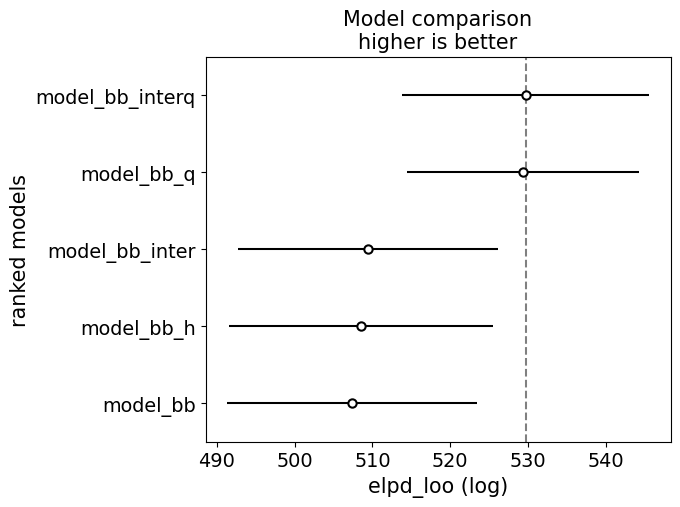

In [ ]:
#define the model
model_bb = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
model_bb_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
model_bb_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
model_bb_q = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + `FTp`:Pos + `FTp`:`3PA` + `3PA`:Pos ", data=bb)
model_bb_interq = bmb.Model("`FGp` ~ `FTp` + `3PA` +Pos + Pos:`3PA`", data=bb)

az.plot_compare(az.compare({

   "model_bb": model_bb.fit(idata_kwargs={"log_likelihood":True}),
   "model_bb_h": model_bb_h.fit(idata_kwargs={"log_likelihood":True}),
   "model_bb_inter": model_bb_inter.fit(idata_kwargs={"log_likelihood":True}),
   "model_bb_q": model_bb_q.fit(idata_kwargs={"log_likelihood":True}),
   "model_bb_interq": model_bb_interq.fit(idata_kwargs={"log_likelihood":True}),


                            })
)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?